In [86]:
#from autoeisd.utils.parsers import get_backbone_pdb
#from idpconfgen.libs.libcalc import calc_torsion_angles
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import numpy as np
import time

In [3]:
from Bio.PDB import PDBParser
import pandas as pd

In [4]:
np.random.seed(12)

In [68]:
hydrogen_abbrev = {
    "ALA": {
        "HB": ["HB1", "HB2", "HB3"], 
    },
    "ARG": {
        "HB": ["HB2", "HB3"], "HG": ["HG2", "HG3"], 
        "HD": ["CD2", "CD3"],  "HH": ["HH11", "HH12", "HH21", "HH22"],
        "HH1": ["HH11", "HH12"], "HH2": ["HH21", "HH22"],
    },
    "ASP": {
        "HB": ["HB2", "HB3"], 
    },
    "ASN": {
        "HB": ["HB2", "HB3"], "HD": ["HD21", "HD22"], "HD2": ["HD21", "HD22"],
    },
    "CYS": {
        "HB": ["HB2", "HB3"], 
    },
    "GLU":{
        "HB": ["HB2", "HB3"], "HG": ["HG2", "HG3"], 
    },
    "GLN": {
        "HB": ["HB2", "HB3"], "HG": ["HG2", "HG3"], "HE": ["HE21", "HE22"], "HE2": ["HE21", "HE22"],
    },
    "GLY": {
        "HA": ["HA2", "HA3"], 
    },
    "HIS": {
        "HB": ["HB2", "HB3"], "HD": ["HD2"], "HE": ["HE1"],
    },
    "ILE": {
        "HB": ["HB2", "HB3"], "HG": ["HG12", "HG13", "HG21", "HG22", "HG23"], 
        "HG1": ["HG12", "HG13"], "HG2": ["HG21", "HG22", "HG23"],
        "HD": ["HD11", "HD12", "HD13"], "HD1": ["HD11", "HD12", "HD13"],
    },
    "LEU": {
        "HB": ["HB2", "HB3"], "HD": ["HD11", "HD12", "HD13", "HD21", "HD22", "HD23"],
        "HD1": ["HD11", "HD12", "HD13"], "HD2": ["HD21", "HD22", "HD23"],
    },
    "LYS": {
        "HB": ["HB2", "HB3"], "HG": ["HG2", "HG3"], "HD": ["HD2", "HD3"], 
        "HZ": ["HZ1", "HZ2", "HZ3"], "HE": ["HE2", "HE3"],
    },
    "MET": {
       "HB": ["HB2", "HB3"], "HG": ["HG2", "HG3"], "HE": ["HE1", "HE2", "HE3"],
    },
    "PHE": {
        "HB": ["HB2", "HB3"], "HD": ["HD1", "HD2"], "HE": ["HE1", "HE2"], 
    },
    "PRO": {
        "HB": ["HB2", "HB3"], "HG": ["HG2", "HG3"], "HD": ["HD2", "HD3"],
    },
    "SER": {
        "HB": ["HB2", "HB3"], 
    },
    "THR":{
        "HB": ["HB2", "HB3"], "HG": ["HG1", "HG21", "HG22", "HG23"], "HG2": ["HG21", "HG22", "HG23"],
    },
    "TRP": {
        "HB": ["HB2", "HB3"], "HD": ["HD1"], "HZ": ["HZ2", "HZ3"], "HE": ["HE1", "HE3"], "HH": ["HH2"],
    },
    "TYR": {
        "HB": ["HB2", "HB3"], "HD": ["HD1", "HD2"], "HE": ["HE1", "HE2"], 
    },
    "VAL": {
        "HG": ["HG11", "HG12", "HG13", "HG21", "HG22", "HG23"], 
        "HG1": ["HG11", "HG12", "HG13"], "HG2": ["HG21", "HG22", "HG23"],
    },
}
heavy_atom_hydrogen = {
    "ALA": {
        "H": ["N"], "HA": ["CA"], "HB": ["CB"],
    },
    "ARG": {
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HG": ["CG"], "HD": ["CD"], "HE": ["NE"], "HH": ["NH1", "NH2"],
    },
    "ASP": {
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HD": ["OD1", "ND2"],
    },
    "ASN": {
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HD": ["OD1", "ND2"],
    },
    "CYS": {
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HG": ["SG"],
    },
    "GLU":{
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HG": ["CG"], 
    },
    "GLN": {
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HG": ["CG"], "HE": ["OE1", "NE2"],
    },
    "GLY": {
        "H": ["N"], "HA": ["CA"],
    },
    "HIS": {
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HD": ["CD2"], "HE": ["CE1"],
    },
    "ILE": {
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HG": ["CG1", "CG2"], "HD": ["CD1"],
    },
    "LEU": {
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HG": ["CG"], "HD": ["CD1", "CD2"],
    },
    "LYS": {
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HG": ["CG"], "HD": ["CD"], "HZ": ["NZ"], "HE": ["CE"],
    },
    "MET": {
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HG": ["CG"], "HE": ["CE"],
    },
    "PHE": {
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HD": ["CD1", "CD2"], "HE": ["CE1", "CE2"], "HZ": ["CZ"],
    },
    "PRO": {
        "H": ["N"], "HB": ["CB"], "HG": ["CG"], "HD": ["CD"],
    },
    "SER": {
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HG": ["SG"],
    },
    "THR":{
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HG": ["OG1", "CG2"], 
    },
    "TRP": {
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HD": ["CD1"], "HZ": ["CZ2", "CZ3"], "HE": ["NE1", "CE3"], "HH": ["CH2"],
    },
    "TYR": {
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HD": ["CD1", "CD2"], "HE": ["CE1", "CE2"], "HH": ["OH"],
    },
    "VAL": {
        "H": ["N"], "HA": ["CA"], "HB": ["CB"], "HG": ["CG1", "CG2"], 
    },
}

In [58]:
from glob import glob
import math
from Bio import PDB


class GetTorsion(object):
    """
    Calculate side-chain torsion angles (also known as dihedral or chi angles).
    Depends: Biopython (http://www.biopython.org)
    """
    
    def __init__(self):
        """Set parameters """
        self.chi_atoms = dict(
        chi1=dict(
            ARG=['N', 'CA', 'CB', 'CG'],
            ASN=['N', 'CA', 'CB', 'CG'],
            ASP=['N', 'CA', 'CB', 'CG'],
            CYS=['N', 'CA', 'CB', 'SG'],
            GLN=['N', 'CA', 'CB', 'CG'],
            GLU=['N', 'CA', 'CB', 'CG'],
            HIS=['N', 'CA', 'CB', 'CG'],
	    HIP=['N', 'CA', 'CB', 'CG'],
            ILE=['N', 'CA', 'CB', 'CG1'],
            LEU=['N', 'CA', 'CB', 'CG'],
            LYS=['N', 'CA', 'CB', 'CG'],
            MET=['N', 'CA', 'CB', 'CG'],
            PHE=['N', 'CA', 'CB', 'CG'],
            PRO=['N', 'CA', 'CB', 'CG'],
            SER=['N', 'CA', 'CB', 'OG'],
            THR=['N', 'CA', 'CB', 'OG1'],
            TRP=['N', 'CA', 'CB', 'CG'],
            TYR=['N', 'CA', 'CB', 'CG'],
            VAL=['N', 'CA', 'CB', 'CG1'],
        ),
        chi2=dict(
            ARG=['CA', 'CB', 'CG', 'CD'],
            ASN=['CA', 'CB', 'CG', 'OD1'],
            ASP=['CA', 'CB', 'CG', 'OD1'],
            GLN=['CA', 'CB', 'CG', 'CD'],
            GLU=['CA', 'CB', 'CG', 'CD'],
            HIS=['CA', 'CB', 'CG', 'ND1'],
            HIP=['N', 'CA', 'CB', 'CG'],
            ILE=['CA', 'CB', 'CG1', 'CD1'],
            LEU=['CA', 'CB', 'CG', 'CD1'],
            LYS=['CA', 'CB', 'CG', 'CD'],
            MET=['CA', 'CB', 'CG', 'SD'],
            PHE=['CA', 'CB', 'CG', 'CD1'],
            PRO=['CA', 'CB', 'CG', 'CD'],
            TRP=['CA', 'CB', 'CG', 'CD1'],
            TYR=['CA', 'CB', 'CG', 'CD1'],
        ),
        chi3=dict(
            ARG=['CB', 'CG', 'CD', 'NE'],
            GLN=['CB', 'CG', 'CD', 'OE1'],
            GLU=['CB', 'CG', 'CD', 'OE1'],
            LYS=['CB', 'CG', 'CD', 'CE'],
            MET=['CB', 'CG', 'SD', 'CE'],
        ),
        chi4=dict(
            ARG=['CG', 'CD', 'NE', 'CZ'],
            LYS=['CG', 'CD', 'CE', 'NZ'],
        ),
    )

        self.default_chi = [1, 2, 3, 4]

    def read_torsions(self, input, chi=None, units=None):
        # Configure chi
        if chi is None:
            chi = self.default_chi
        chi_names = list()
        for x in chi:
            reg_chi = "chi%s" % x
            if reg_chi in self.chi_atoms.keys():
                chi_names.append(reg_chi)
                alt_chi = "altchi%s" % x
                if alt_chi in self.chi_atoms.keys():
                    chi_names.append(alt_chi)
        self.chi_names = chi_names
        self.fieldnames = ["id", "model", "chain", "resn", "resi"] + self.chi_names

        # Configure units (degrees or radians)
        if units is None:
            units = "degrees"
        self.degrees = bool(units[0].lower() == "d")

        # Construct list of files
        files = input #glob(os.path.join(input, "*.pdb"))

        # Load parser
        self.parser = PDB.PDBParser(QUIET=True)

        # Process files
        out_data = list()
        for fn in files:
            torsion_list = self._calculate_torsion(fn)
            out_data.extend(torsion_list)
     
        return self.out_to_dict(out_data)

    def _calculate_torsion(self, fn):
        """Calculate side-chain torsion angles for given file"""
        id = os.path.splitext(os.path.basename(fn))[0]

        torsion_list = list()

        structure = self.parser.get_structure(id, fn)
        for model in structure:
            model_name = model.id
            for chain in model:
                chain_name = chain.id
                for res in chain:
                    # Skip heteroatoms
                    if res.id[0] != " ": continue
                    res_name = res.resname
                    if res_name in ("ALA", "GLY"): continue
                    chi_list = [""] * len(self.chi_names)
                    for x, chi in enumerate(self.chi_names):
                        chi_res = self.chi_atoms[chi]
                        try:
                            atom_list = chi_res[res_name]
                        except KeyError:
                            continue
                        try:
                            vec_atoms = [res[a] for a in atom_list]
                        except KeyError:
                            chi_list[x] = float("nan")
                            continue
                        vectors = [a.get_vector() for a in vec_atoms]
                        angle = PDB.calc_dihedral(*vectors)
                        if self.degrees:
                            angle = math.degrees(angle)
                        chi_list[x] = angle

                    resi = "{0}{1}".format(res.id[1], res.id[2].strip())
                    row = [id, model_name, chain_name, res_name, resi] + chi_list
                    torsion_list.append(dict(zip(self.fieldnames, row)))

        return torsion_list

    def out_to_dict(self, outdata):
        df = {'resn': [], 'resi': []}
        for key in self.chi_atoms:
            df[key] = []
        for line in outdata:
            for key in df:
                if isinstance(line[key], str) and len(line[key])==0:
                    df[key].append(None)
                elif key not in line.keys():
                    df[key].append(None)
                elif key == 'resi':
                    df[key].append(int(line[key]))
                else:
                    df[key].append(line[key])
            
        return df

In [6]:
def get_backbone_pdb(path, pdb_split=1):
    # read energy file to dataframe
    parser = PDBParser()
    data = parser.get_structure('data', path)
    models = data.get_models()

    i_count = 0
    n_atoms = 0
    splits = []
    while True:
        try:
            model = next(models)
            i_count += 1


            atoms = []
            for residue in model.get_residues():
                res_name = residue.get_resname()
                atoms += [residue['N'].get_coord(), residue['CA'].get_coord(),
                          residue['C'].get_coord()]

            atoms = np.array(atoms)

            # sanity check
            if i_count == 1:
                n_atoms = atoms.shape[0]
            else:
                assert atoms.shape == (n_atoms, 3)

            splits.append(atoms)

            if i_count % pdb_split == 0:
                splits = np.array(splits)
                assert splits.shape == (pdb_split, n_atoms, 3)
                yield splits
                splits = []

        except StopIteration:
            break


In [7]:
"""
Copyright: https://github.com/joaomcteixeira/IDPConformerGenerator/blob/cacb4be7effd51da6876ca242ed2250766198453/src/idpconfgen/libs/libcalc.py

"""

def calc_torsion_angles(
        coords,
        ARCTAN2=np.arctan2,
        CROSS=np.cross,
        DIAGONAL=np.diagonal,
        MATMUL=np.matmul,
        NORM=np.linalg.norm,
        ):
    """
    Calculate torsion angles from sequential coordinates.
    Uses ``NumPy`` to compute angles in a vectorized fashion.
    Sign of the torsion angle is also calculated.
    Uses Prof. Azevedo implementation:
    https://azevedolab.net/resources/dihedral_angle.pdf
    Example
    -------
    Given the sequential coords that represent a dummy molecule of
    four atoms:
    >>> xyz = numpy.array([
    >>>     [0.06360, -0.79573, 1.21644],
    >>>     [-0.47370, -0.10913, 0.77737],
    >>>     [-1.75288, -0.51877, 1.33236],
    >>>     [-2.29018, 0.16783, 0.89329],
    >>>     ])
    A1---A2
           \
            \
            A3---A4
    Calculates the torsion angle in A2-A3 that would place A4 in respect
    to the plane (A1, A2, A3).
    Likewise, for a chain of N atoms A1, ..., An, calculates the torsion
    angles in (A2, A3) to (An-2, An-1). (A1, A2) and (An-1, An) do not
    have torsion angles.
    If coords represent a protein backbone consisting of N, CA, and C
    atoms and starting at the N-terminal, the torsion angles are given
    by the following slices to the resulting array:
    - phi (N-CA), [2::3]
    - psi (CA-C), [::3]
    - omega (C-N), [1::3]
    Parameters
    ----------
    coords : numpy.ndarray of shape (N>=4, 3)
        Where `N` is the number of atoms, must be equal or above 4.
    Returns
    -------
    numpy.ndarray of shape (N - 3,)
        The torsion angles in radians.
        If you want to convert those to degrees just apply
        ``np.degrees`` to the returned result.
    """
    # requires
    assert coords.shape[0] > 3
    assert coords.shape[1] == 3

    crds = coords.T
    q_vecs = crds[:, 1:] - crds[:, :-1]
    cross = CROSS(q_vecs[:, :-1], q_vecs[:, 1:], axis=0)
    unitary = cross / NORM(cross, axis=0)

    # components
    u0 = unitary[:, :-1]
    u1 = unitary[:, 1:]
    u3 = q_vecs[:, 1:-1] / NORM(q_vecs[:, 1:-1], axis=0)
    u2 = CROSS(u3, u1, axis=0)
    cos_theta = DIAGONAL(MATMUL(u0.T, u1))
    sin_theta = DIAGONAL(MATMUL(u0.T, u2))

    # torsion angles
    return -ARCTAN2(sin_theta, cos_theta)

In [8]:
asyn_seq = 'MDVFMKGLSKAKEGVVAAAEKTKQGVAEAAGKTKEGVLYVGSKTKEGVVHGVATVAEKTKEQVTNVGGAV\
VTGVTAVAQKTVEGAGSIAAATGFVKKDQLGKNEEGAPQEGILEDMPVDPDNEAYEMPSEEGYQDYEPEA' 
drk_seq = 'MEAIAKHDFSATADDELSFRKTQILKILNMEDDSNWYRAELDGKEGLIPSNYIEMKNHD'
sic1_seq = "GSMTPSTPPRSRGTRYLAQPSGNTSSSALMQGQKTPQKPSQNLVPVTPSTTKSFKNAPLLAPPNSNMGMTSPFNGLTSPQRSPFPKSSVKRT"
ab40_seq = "DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVV"

In [62]:
# read JC exp file
exp = pd.read_csv('exp_data/asyn_jc.txt')
# align torsion index as the first residue doesn't have phi torsion
resn = exp.resnum.values - 2

jc_bc = []
phi = []
psi = []
for n in range(200):
    pdb = '../IDPdiff/local/esm_200T/epoch_170_sample/asyn/%i_relax.pdb'%(n+100)
    # calculates JC back calculation alphas from phi torsions
    coords = next(get_backbone_pdb(pdb, 1))[0]
    phi += list(calc_torsion_angles(coords)[2::3])
    psi += list(calc_torsion_angles(coords)[0::3])
    alpha = np.cos(calc_torsion_angles(coords)[2::3][resn] - np.radians(60))
    jc_bc.append(alpha)


In [63]:
# read EFRET exp file (format modified)
# the EFRET exp file format is based on aSyn repository:
# column names: index, res1, res2, scaler, value
# where scaler is the r0 Foster radius of the dye pair
exp = pd.read_csv('exp_data/asyn_efret.txt')
res1 = exp.res1.values.astype(int)
res2 = exp.res2.values.astype(int)
scaler = exp.scale.values

# generates smFRET back calculation data
fret_bc = []
p = PDBParser()
for n in range(200):
    # read pdb files to back calculate
    pdb = '../IDPdiff/local/esm_200T/epoch_170_sample/asyn/%i_relax.pdb'%(n+100)
    struct = p.get_structure('d', pdb)
    # assumes CA as atom labeled
    for j in range(exp.shape[0]):
        r1 = int(res1[j])
        r2 = int(res2[j])
        d = struct[0]['A'][r1]['CA'] - struct[0]['A'][r2]['CA'] 
        # scale_factor to adjust for dye size and CA to label distances
        #scale_factor = ((np.abs(r1 - r2) + 7) / np.abs(r1 - r2)) ** 0.5
        #d = d*scale_factor
        eff = 1.0/(1.0+(d/scaler[j])**6.0)
        #assert isinstance(eff, np.ndarray)
        fret_bc.append(eff)
    if n%100 ==0: time.sleep(5)
fret_bc = np.reshape(fret_bc, (-1, exp.shape[0]))


In [75]:
def pre_backcalc(exp_data, pdbs, heavy_atom_substitute=False):
    exp_data = pd.read_csv(exp_data)
    res1 = exp_data.res1.values.astype(int)
    atom1_name = exp_data.atom1.values
    res2 = exp_data.res2.values.astype(int)
    atom2_name = exp_data.atom2.values
    
    #PREs
    p = PDBParser()
    pre_bc = np.zeros((len(pdbs), len(exp_data)))
    for i, pdb in enumerate(pdbs):
        struct = p.get_structure('d', pdb)
        for j in range(exp_data.shape[0]):
            r1 = int(res1[j])
            r2 = int(res2[j])
            resn1 = struct[0]['A'][r1].get_resname()
            resn2 = struct[0]['A'][r2].get_resname()
            if heavy_atom_substitute:
                if atom1_name[j].startswith("H"):
                    heavy_atom1 = heavy_atom_hydrogen[resn1][atom1_name[j][:2]][0]
                    atom1 = struct[0]['A'][r1][heavy_atom1]
                else:
                    atom1 = struct[0]['A'][r1][atom1_name[j]]
                if atom2_name[j].startswith("H"):
                    heavy_atom2 = heavy_atom_hydrogen[resn2][atom2_name[j][:2]][0]
                    atom2 = struct[0]['A'][r2][heavy_atom2]
                else:
                    atom2 = struct[0]['A'][r2][atom2_name[j]]
            else:
                try:
                    atom1 = struct[0]['A'][r1][atom1_name[j]]
                except KeyError:
                    atom1 = struct[0]['A'][r1][hydrogen_abbrev[resn1][atom1_name[j]][0]]
                try:
                    atom2 = struct[0]['A'][r2][atom2_name[j]]
                except KeyError:
                    atom2 = struct[0]['A'][r2][hydrogen_abbrev[resn2][atom2_name[j]][0]]
            pre_bc[i, j] = atom1 - atom2
    return pre_bc
    
    
def noe_backcalc(exp_data, pdbs, heavy_atom_substitute=False):
    exp_data = pd.read_csv(exp_data)
    res1 = exp_data.res1.values.astype(int)
    atom1_name = exp_data.atom1.values
    res2 = exp_data.res2.values.astype(int)
    atom2_name = exp_data.atom2.values
    
    #multi1 = exp_data.atom1_multiple_assignments.values
    #multi2 = exp_data.atom2_multiple_assignments.values
    # NOEs calculations
    p = PDBParser()
    noe_bc = np.zeros((len(pdbs), len(exp_data)))
    for i, pdb in enumerate(pdbs):
        struct = p.get_structure('d', pdb)
        for j in range(exp_data.shape[0]):
            r1 = int(res1[j])
            r2 = int(res2[j])
            resn1 = struct[0]['A'][r1].get_resname()
            resn2 = struct[0]['A'][r2].get_resname()
    
            if heavy_atom_substitute:
                if atom1_name[j].startswith("H"):
                    heavy_atom1 = heavy_atom_hydrogen[resn1][atom1_name[j][:2]]
                    atom1_list = [struct[0]['A'][r1][a] for a in heavy_atom1]
                else:
                    atom1_list = [struct[0]['A'][r1][atom1_name[j]]]
                if atom2_name[j].startswith("H"):
                    heavy_atom2 = heavy_atom_hydrogen[resn2][atom2_name[j][:2]]
                    atom2_list = [struct[0]['A'][r2][a] for a in heavy_atom2]
                else:
                    atom2_list = [struct[0]['A'][r2][atom2_name[j]]]
            else:
                try:
                    atom1_list = [struct[0]['A'][r1][atom1_name[j]]]
                except KeyError:
                    atom1_list = [struct[0]['A'][r1][a] for a in hydrogen_abbrev[resn1][atom1_name[j]]]
                try:
                    atom2_list = [struct[0]['A'][r2][atom2_name[j]]]
                except KeyError:
                    atom2_list = [struct[0]['A'][r2][a] for a in hydrogen_abbrev[resn2][atom2_name[j]]]
            combos = 0.0
            num_combos = 0
            # handles multiple atom assignments by <r^-6>
            for first_atom in atom1_list:
                for second_atom in atom2_list:
                    combos += (first_atom - second_atom)**(-6.)
                    num_combos += 1
    
            noe_bc[i, j] = (combos/float(num_combos))**(-1/6)
    return noe_bc

In [81]:
# read NOE exp file
exp = 'exp_data/ab40_noes.txt'
pdbs = ['../IDPdiff/local/esm_200T/epoch_170_sample/ab40/%i_relax.pdb'%(n) for n in range(200)]
noe_bc = noe_backcalc(exp, pdbs, heavy_atom_substitute=True)

In [82]:
noe_bc.shape

(200, 20)

In [83]:
# save back calculations as csv
#old_alphas = pd.read_csv('Desktop/X-EISD/back_calc_data/noe.txt', header=None, index_col=0)
#new = np.vstack((old_alphas.values, np.array(noe_bc)))
new_alphas = pd.DataFrame(noe_bc, index=None) 
new_alphas.to_csv('../IDPdiff/local/esm_200T/epoch_170_sample/ab40/noe.txt', header=None)


In [10]:
import mdtraj as md

def count_ssp(ssp, nseq, ssp_pop):
    for res in range(nseq):
        if ssp[res] in [' ', 'C']: pass
        elif ssp[res] == 'T': ssp_pop['turn'].append(res + 1)
        elif ssp[res] in ['B', 'b']: ssp_pop['bridge'].append(res + 1)
        elif ssp[res] == 'H': ssp_pop['helix'].append(res + 1)
        elif ssp[res] == 'G': ssp_pop['310-helix'].append(res + 1)
        elif ssp[res] == 'I': ssp_pop['pi-helix'].append(res + 1)
        elif ssp[res] == 'E': ssp_pop['strand'].append(res + 1)
        elif ssp[res] == 'S': ssp_pop['bend'].append(res + 1)
        elif ssp[res] == 'NA': print('non protein residue')
        else: raise Exception('Secondary structure type not recognized, ', ssp[res])
    
def ssp_per_residue(ssp_pop, nseq, npdb):
    ssp_res = {}
    for key in ssp_pop:
        ssp_res[key] = []
        #ssp_pop[key].sort()
        for n in range(nseq):
            ssp_res[key].append((np.array(ssp_pop[key]) == n+1).sum() / npdb)
    return pd.DataFrame(ssp_res)

# secondary structure propensity
def calc_struct_features(seq_len, pdblist):
    ssp_pop = {'turn':[], 'bridge':[], 'helix':[], 'pi-helix':[], '310-helix':[],
               'strand':[], 'bend':[]}

    res_ssp = {}
    for filename in pdblist:
        pdb = md.load(filename)
        dssp = md.compute_dssp(pdb, False)
        ss = ''.join(dssp[0])
        count_ssp(ss, seq_len, ssp_pop)

    res_ssp = ssp_per_residue(ssp_pop, seq_len, len(pdblist))
    return res_ssp


In [11]:
dssplist = {'T': [], 'E': [], 'H': []}
for n in range(1):
    #idxs = np.random.randint(200, size=100)
    pdblist = glob('../IDPdiff/local/esm_200T/xeisd_opt/ab40/noe_ref_relax/*.pdb')
    res_ssp = calc_struct_features(40, pdblist)

    dssplist['E'].append(np.sum(res_ssp[['strand', "bridge"]], axis=1))
    dssplist['T'].append(np.sum(res_ssp[['bend', 'turn']], axis=1))
    dssplist['H'].append(np.sum(res_ssp[['helix', '310-helix', 'pi-helix']], axis=1))

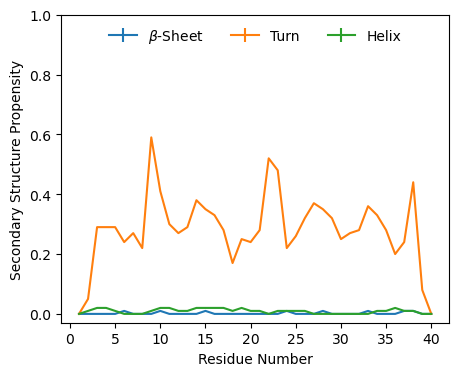

In [12]:
x = np.arange(40) + 1
labelmap = {'E': r'$\beta$-Sheet', 'T': 'Turn', 'H': r'Helix'}
colormap = {'H': 'C2', 'T': 'C1', 'E': 'C0'}
#cmap = {'H': 'darkseagreen', 'T': 'burlywood', 'E': 'cornflowerblue'}

f, ax = plt.subplots(1, 1, figsize=(5, 4))
for key in labelmap:
    m = np.mean(dssplist[key], axis=0)
    ax.errorbar(x, m, yerr=np.std(dssplist[key], axis=0), label=labelmap[key], c=colormap[key])
ax.set_ylim(top=1)
ax.set_xlabel('Residue Number')
ax.set_ylabel('Secondary Structure Propensity')
ax.legend(loc='upper center', ncol=3, frameon=False)

#params = {'axes.labelsize': 10, 'xtick.labelsize':10, 
#          'ytick.labelsize': 10, 'lines.linewidth': 1}
#plt.rcParams.update(params)
#plt.tight_layout()
plt.show()

In [100]:

Rgs = []
for n in range(200):
    pdb = '../IDPdiff/local/esm_200T/epoch_170_sample/ab40/%i_relax.pdb'%(n)
    Rgs.append(md.compute_rg(md.load(pdb)[0])[0] * 10.)
np.mean(Rgs), np.std(Rgs)


(18.392058832819394, 4.221505426936525)

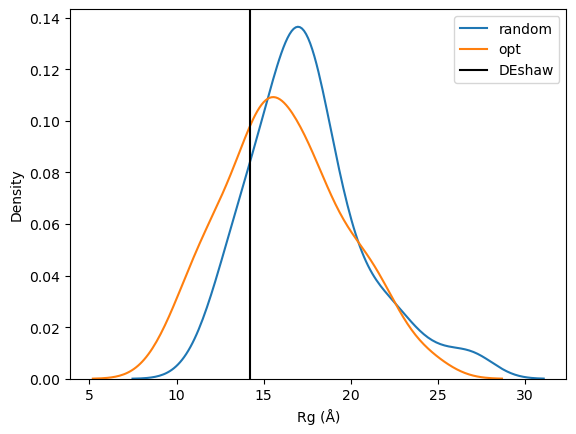

In [97]:
#plt.hist(Rgs[-50:], bins=np.arange(10, 50, 1), density=True, alpha=0.5, label="50% polyproline-beta")
#plt.hist(Rgs[200:250], bins=np.arange(10, 50, 1), density=True, alpha=0.5, label="80% polyproline-beta")
sns.kdeplot(Rgs, label="random")
sns.kdeplot(ens_rg, label="opt")

#plt.errorbar(x=20.79, y=0.01, xerr=4, color="black", capsize=5)
plt.axvline(x=14.2, label="DEshaw", color="black")
plt.xlabel('Rg (Å)')
plt.legend()

In [110]:
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
from scipy.spatial import distance_matrix

def pairwise(protein):
    crds = []
    p = PDBParser()
    struct = p.get_structure('d', protein)
    for res in struct[0]["A"].get_residues():
        crds.append(res["CA"].get_coord())
    return distance_matrix(crds, crds) #.flatten()


def read_ss_from_pdb(pdb):
    with open(pdb, "r") as f:
        pdb_string = f.read()
    return pdb_string.split("REMARK ")[1].split().strip()

def read_rg_from_pdb(pdb):
    with open(pdb, "r") as f:
        pdb_string = f.read()
    return float(pdb_string.split("Rg")[1].split()[0].strip())

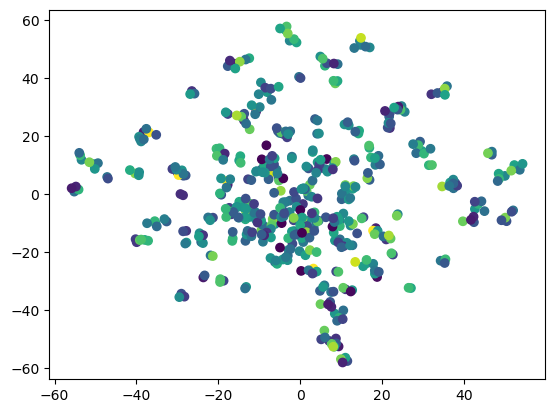

In [115]:
#fig, ax = plt.subplots(1, 5, figsize=(15, 3))

Z = np.load("../IDPdiff/local/esm_200T/xeisd_opt/ab40/trial_2/test_Zs.npy")
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
ens_rg = []

for i in range(5):
    ens_rg = []
    df = pd.read_csv("../IDPdiff/local/esm_200T/xeisd_opt/ab40/trial_2/step_%s.csv"%((i+1) * 4))
    index = df.pdb.apply(lambda x: int(x.split("/")[-1].split("_")[0]) - 1) * 400 + df.pdb.apply(lambda x: int(x.split("/")[-1].split("_")[1][:-4]) - 1)
    for p in df.pdb:
        pdb = "../IDPdiff/local/esm_200T/xeisd_opt/ab40/trial_2/" + os.path.basename(p)
        ens_rg.append(read_rg_from_pdb(pdb))
        #dssp = ''.join(md.compute_dssp(md.load(pdb), False)[0])

    z_tsne = tsne.fit_transform(Z[index].reshape(100, -1))
    plt.scatter(z_tsne[:, 0], z_tsne[:, 1], c=ens_rg)

In [ ]:
ens_drmsd = []
df = pd.read_csv("../IDPdiff/local/esm_200T/xeisd_opt/ab40/trial_2/step_20.csv")
for p in df.pdb:
    pdb = "../IDPdiff/local/esm_200T/xeisd_opt/ab40/trial_2/" + os.path.basename(p)
    ens_drmsd.append(pairwise(pdb))

rand_drmsd = []
for n in np.random.randint(200, size=100):
    pdb = f"../IDPdiff/local/esm_200T/epoch_170_sample/ab40/{n}_relax.pdb"
    rand_drmsd.append(pairwise(pdb))

drmsd = np.triu(ens_drmsd) + np.tril(rand_drmsd)
sns.heatmap(drmsd.min(axis=0), cmap="viridis_r")

In [59]:
# check sidechain torsion distribution
torsion_calc = GetTorsion()
pdbdir = [f"../IDPdiff/local/esm_200T/xeisd_opt/ab40/trial_2/{i+2}_{p+1}.pdb" for p in range(400)]
df = torsion_calc.read_torsions(pdbdir)
#plt.hist([x for x in df['chi1'] if x is not None], bins=np.linspace(-180, 180, 18))


In [ ]:
# reads violation counts from PDB
after = []
before = []
for n in range(50):
    pdb = '../IDPdiff/local/esm_full/generate/drkn_%i_relax.pdb'%(n)
    with open(pdb, "r") as f:
        remarks = f.read().split("REMARK ")
    for r in remarks:
        if "violation_per_residue" in r:
            after.append([int(i.strip()) for i in r.split("[")[-1].split("]")[0].split(".")[:-1]])
        if "violation per residue" in r:
            before.append([int(i) for i in r.split()[3].strip()])

In [44]:
after = np.mean(after, axis=0)
before = np.mean(before, axis=0)

Text(0, 0.5, 'percent violations per residue')

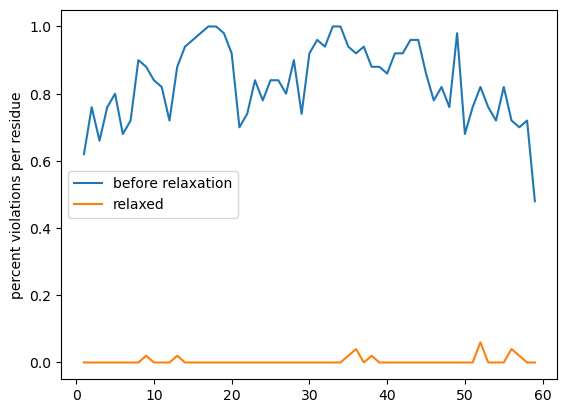

In [48]:
plt.plot(np.arange(59)+1, before, label='before relaxation')
plt.plot(np.arange(59)+1, after, label='relaxed')
plt.legend()
plt.ylabel('percent violations per residue')

In [37]:
from Bio.Align import substitution_matrices

blosum62 = substitution_matrices.load("BLOSUM62")